# Demonstration Machine Learning in Python

The [Titanic data set from Kaggle](https://www.kaggle.com/c/titanic) is used in this project.

We try to classify the passengers of the Titanic by their "survival" or "deceased" status.

The data set is not entirely clean, so some data cleansing skills are needed as well.

# Einbinden der Standardbibliotheken für Datenvisualisierung

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from matplotlib import rcParams
rcParams['patch.force_edgecolor'] = True
rcParams['patch.facecolor'] = 'b'

In [3]:
df_train = pd.read_csv('titanic_train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Datavisualization

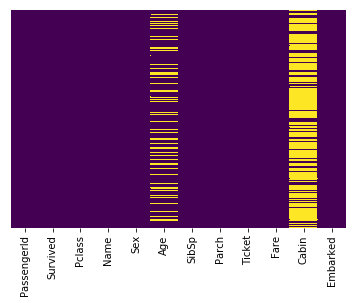

In [5]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In the plot above we can see which columns of the dataset contain null values and roughly how much of every column is actually empty.
The column 'Cabin' is empty most of the time, therfore this column will be removed later on in this project.

But how should the column 'Age' should be handled. To determine an approach for this a deeper visulaization of the data set might be useful.

Next up a boxplot describes how many passengers survived and how many not.

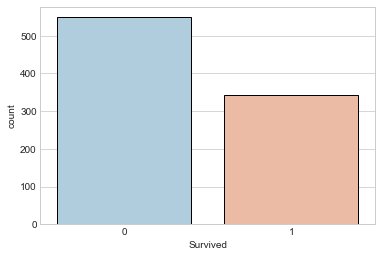

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df_train,palette='RdBu_r')

Now this distribution between survived and deceased passengers will be visualized relative to the sex of the passengers.

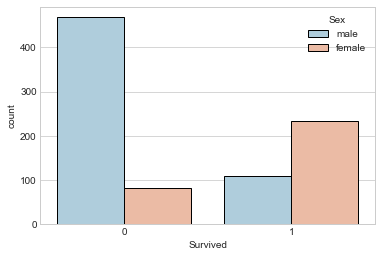

In [7]:
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='RdBu_r')

As we can see roughly twice as many female passengers survived as male passengers did.

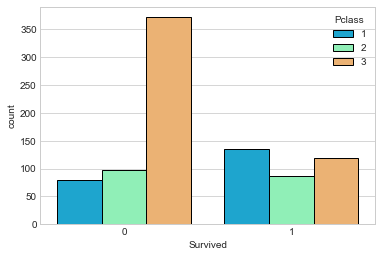

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')

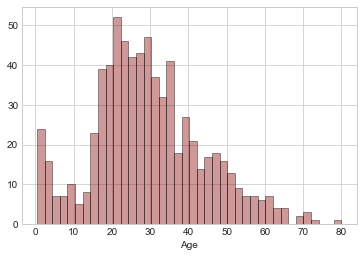

In [9]:
sns.distplot(df_train['Age'].dropna(),kde=False,color='darkred',bins=40)

# Bereinigung der Daten

Wir könnten die 'Age' Spalte raus nehmen oder den mittelwert des Alters der Passagiere an den fehlenden stellen eintragen. Es geht aber noch besser. Wir setzen den mittelwert der entsprechenden 'PClass' Passagierklasse ein. Ob und wie sich das Alter abhängig von der Passagierklasse unterscheidet sehen wir in der nachfolgenden Grafik.

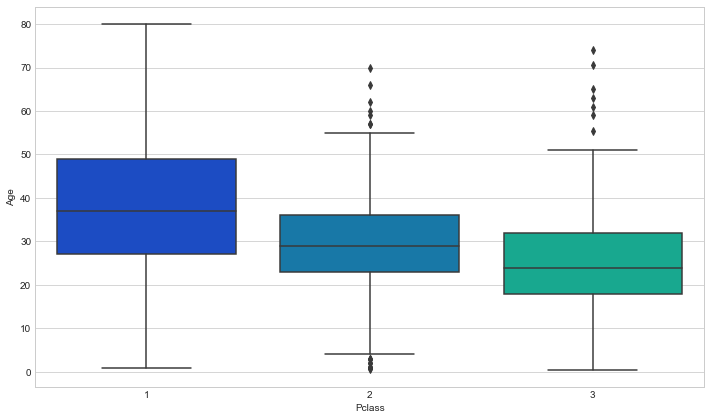

In [10]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df_train,palette='winter')

In [11]:
def add_average_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [12]:
df_train['Age'] = df_train[['Age','Pclass']].apply(add_average_age,axis=1)

Anschließend überprüfen wir die Daten erneut

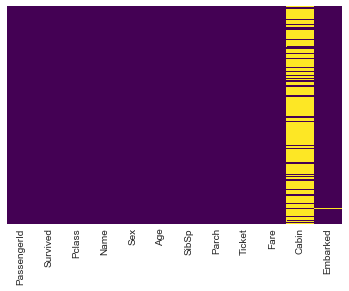

In [13]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Nun löschen für die Spalte 'Cabin' und auch den einen Null-Wert der Spalte 'Embarked'

In [14]:
df_train.drop('Cabin',axis=1,inplace=True)
df_train.dropna(inplace=True)

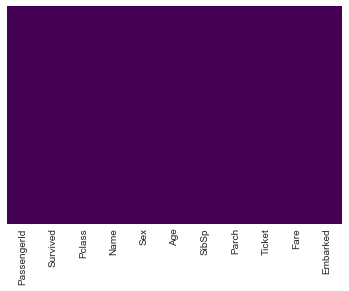

In [15]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Datenaufbereitung für Machine Learning Algorithmen

um nun Spalten wie 'Sex' und 'Embarked' nutzbar zu machen müssen die kategorischen Werte zum Beispiel 'male' und 'female' in Zahlen zum Beispiel 0 und 1 konvertiert werden. Python bzw. Pandas bietet hierfür eine Funktion um Dummy Parameter bzw. Spalten aus diesen kategorischen Werten zu erzeugen. 

In [17]:
sex = pd.get_dummies(df_train['Sex'],drop_first=True)
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)

In [18]:
df_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df_train = pd.concat([df_train,sex,embark],axis=1)

In [19]:
df_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Model konstruktion und Evaluation
nun da alle Spalten der Trainingsdaten nur noch Zahlenwerte beinhalten können wir nun mit der Erzeugung verschiedener Modelle beginnen und diese anschließend evaluieren

# Entscheidungsbaum Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
X = df_train.drop('Survived',axis=1)
y = df_train['Survived']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
predictions = dtree.predict(X_test)

In [25]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[133  28]
 [ 36  70]]


             precision    recall  f1-score   support

          0       0.79      0.83      0.81       161
          1       0.71      0.66      0.69       106

avg / total       0.76      0.76      0.76       267



In [26]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X)
features

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

In [27]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# RandomForest Model

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[142  19]
 [ 32  74]]


             precision    recall  f1-score   support

          0       0.82      0.88      0.85       161
          1       0.80      0.70      0.74       106

avg / total       0.81      0.81      0.81       267



# Support Vektor Machines

In [30]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159   2]
 [106   0]]


             precision    recall  f1-score   support

          0       0.60      0.99      0.75       161
          1       0.00      0.00      0.00       106

avg / total       0.36      0.60      0.45       267



In [32]:
model = SVC(kernel='linear')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[141  20]
 [ 37  69]]


             precision    recall  f1-score   support

          0       0.79      0.88      0.83       161
          1       0.78      0.65      0.71       106

avg / total       0.79      0.79      0.78       267



In [ ]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.81      0.24      0.37       161
          1       0.44      0.92      0.60       106

avg / total       0.66      0.51      0.46       267



In [ ]:
model = SVC(kernel='poly', degree=3)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

# Verbesserter Ansatz für Support Vector Machines

Hier werden nun für Support Vector Machines einige Parameter durchgespielt um den besten Bias-Variance Trade-off herauszufinden. Dies kann beliebig granular durchgeführt werden, dauert dann aber entsprechend länger.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
# May take awhile!
# grid.fit(X_train,y_train)

In [ ]:
# grid.best_params_

In [ ]:
# grid_predictions = grid.predict(X_test)
# print(confusion_matrix(y_test,grid_predictions))
# print('\n')
# print(classification_report(y_test,grid_predictions))